In [3]:
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
from data_loader import SRCNN_dataset
from model import SRCNN
from solver import train
from utils import *
import matplotlib.pyplot as plt

%matplotlib inline

train_config = {
    'dir_path': 'Train',
    'scale': 3,
    'is_gray': True,
    'input_size': 33,
    'label_size': 21,
    'stride': 21
}

test_config = train_config.copy()
test_config['dir_path'] = 'Test/Set5'

train_dataset = SRCNN_dataset(train_config)
model = SRCNN()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
model = train(train_dataset, model, loss_fn, 
      optimizer, num_epochs=10, batch_size=128)



Epoch 1, iter     0, loss 0.20640
torch.Size([128, 1, 33, 33]) torch.Size([128, 1, 21, 21])
Epoch 1, iter    10, loss 0.17830
torch.Size([128, 1, 33, 33]) torch.Size([128, 1, 21, 21])
Epoch 1, iter    20, loss 0.10699
torch.Size([128, 1, 33, 33]) torch.Size([128, 1, 21, 21])
Epoch 1, iter    30, loss 0.04934
torch.Size([128, 1, 33, 33]) torch.Size([128, 1, 21, 21])
Epoch 1, iter    40, loss 0.01810
torch.Size([128, 1, 33, 33]) torch.Size([128, 1, 21, 21])
Epoch 1, iter    50, loss 0.00775
torch.Size([128, 1, 33, 33]) torch.Size([128, 1, 21, 21])
Epoch 1, iter    60, loss 0.01219
torch.Size([128, 1, 33, 33]) torch.Size([128, 1, 21, 21])
Epoch 1, iter    70, loss 0.01035
torch.Size([128, 1, 33, 33]) torch.Size([128, 1, 21, 21])
Epoch 2, iter     0, loss 0.00784
torch.Size([128, 1, 33, 33]) torch.Size([128, 1, 21, 21])
Epoch 2, iter    10, loss 0.00893
torch.Size([128, 1, 33, 33]) torch.Size([128, 1, 21, 21])
Epoch 2, iter    20, loss 0.00942
torch.Size([128, 1, 33, 33]) torch.Size([128, 

279 279


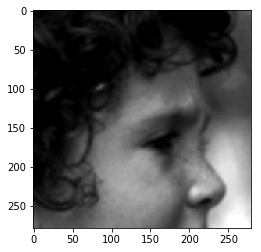

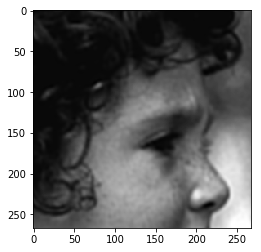

In [4]:
import torch
from torch.autograd import Variable
%matplotlib inline

paths = get_image_paths('Test/Set5')
image = imread(paths[2])
test_sample, test_label = process_image(image)
h, w = test_sample.shape
print(h, w)
test_input = test_sample.reshape(1, h, w, 1)
test_input = test_input.transpose(0, 3, 1, 2)
test_input = torch.Tensor(test_input)
test_input = Variable(test_input)
test_output = model(test_input)

test_output = test_output.data.numpy()
test_output = test_output[0].transpose(1, 2, 0)
h, w = test_output.shape[0], test_output.shape[1]
test_output = test_output.reshape(h, w)


plt.imshow(test_sample, cmap='gray')
plt.pause(0.005)
plt.imshow(test_output, cmap='gray')

In [9]:
for num in range(3):
    name='train-'+str(num)+'EPOCH_model'
    torch.save(model,name)

In [5]:

torch.save(model,'srcnn-2d.pkl')

In [6]:
load_net=torch.load('srcnn-2d.pkl')

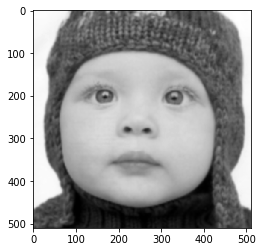

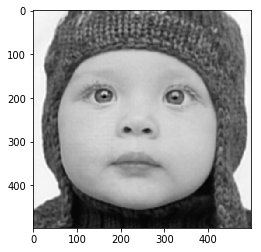

In [7]:
import torch
from torch.autograd import Variable
%matplotlib inline

paths = get_image_paths('Test/Set5')
image = imread(paths[1])
test_sample, test_label = process_image(image)
h, w = test_sample.shape
# print(h, w)
test_input = test_sample.reshape(1, h, w, 1)
test_input = test_input.transpose(0, 3, 1, 2)
test_input = torch.Tensor(test_input)
test_input = Variable(test_input)
test_output = load_net(test_input)

test_output = test_output.data.numpy()
test_output = test_output[0].transpose(1, 2, 0)
h, w = test_output.shape[0], test_output.shape[1]
test_output = test_output.reshape(h, w)


plt.imshow(test_sample, cmap='gray')
plt.pause(0.005)
plt.imshow(test_output, cmap='gray')